# Aufgabe 6 Cross Validation und Grid Search

## (1) ein Datensatz für die Klassifikationsaufgabe

Ich habe einen Datensatz von Commeo and Osmancik Rice Dataset ( siehe https://www.muratkoklu.com/datasets/ ) gesucht. Für die beiden Arten wurden insgesamt 3810 Bilder von Reiskörnern aufgenommen, verarbeitet und Rückschlüsse auf Merkmale gezogen. Für jedes Reiskorn wurden 7 morphologische Merkmale erhalten.

In [97]:
# import all the important basic packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from joblib import Parallel

In [98]:
# import data

rice_df = pd.read_excel('../dataset/Rice_Cammeo_Osmancik.xlsx', engine='openpyxl')

Die Beschreibung des Datensatzes lautet wie folgt:

In [99]:
rice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   int64  
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.2+ KB


In [100]:
rice_df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


## (2) Unter verschiedenen Algorithmen und Hyperparameter das "beste" Modell zu finden

In [101]:
# orignial Daten preprocessing
# Training Set and Testing Set spliting

X, y = rice_df.drop(columns = 'Class'), rice_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

### (a) Modell 1: Logistic Regression

In [102]:
from sklearn.linear_model import LogisticRegression

LogistReg_clf = LogisticRegression().fit(X_train, y_train)
LogistReg_clf.score(X_test, y_test)

0.937007874015748

Logistic Regression mit dem Anpassen der Hyperparameter eines Schätzers

In [103]:
gridsearch_LogistReg = GridSearchCV(estimator = LogisticRegression(), param_grid = {'C': [1, 5], 'random_state': [1, 5]}).fit(X_train, y_train)

print("Best Estimator is: {}".format(gridsearch_LogistReg.best_estimator_))
print("Best score on train dataset is: {}".format(gridsearch_LogistReg.best_score_))
print("The score on test dataset is: {}".format(gridsearch_LogistReg.score(X_test, y_test)))

Best Estimator is: LogisticRegression(C=1, random_state=1)
Best score on train dataset is: 0.9284729064039409
The score on test dataset is: 0.937007874015748


### (b) Modell 2: Ridge Classifier

In [104]:
from sklearn.linear_model import RidgeClassifier

Ridge_clf = RidgeClassifier().fit(X_train, y_train)
Ridge_clf.score(X_test, y_test)

0.9409448818897638

Ridge Classifier mit dem Anpassen der Hyperparameter eines Schätzers

In [105]:
gridsearch_Ridge = GridSearchCV(estimator = RidgeClassifier(), param_grid = {'alpha': [1, 5], 'random_state': [1, 5]}).fit(X_train, y_train)

print("Best Estimator is: {}".format(gridsearch_LogistReg.best_estimator_))
print("Best score on train dataset is: {}".format(gridsearch_LogistReg.best_score_))
print("The score on test dataset is: {}".format(gridsearch_LogistReg.score(X_test, y_test)))

Best Estimator is: LogisticRegression(C=1, random_state=1)
Best score on train dataset is: 0.9284729064039409
The score on test dataset is: 0.937007874015748


### (c) Modell 3: benutzen Gradient Decent zur Verbesserung (rule update)

In [106]:
from sklearn.linear_model import SGDClassifier

SGD_clf = SGDClassifier().fit(X_train, y_train)
SGD_clf.score(X_test, y_test)

0.7309711286089239

SGDClassifier mit dem Anpassen der Hyperparameter eines Schätzers

In [107]:
gridsearch_SGD = GridSearchCV(estimator = SGDClassifier(), 
                              param_grid = {'alpha': [1, 10], 'max_iter': [100, 10000], 'early_stopping': [True], 'random_state': [1, 10]}).fit(X_train, y_train)

print("Best Estimator is: {}".format(gridsearch_SGD.best_estimator_))
print("Best score on train dataset is: {}".format(gridsearch_SGD.best_score_))
print("The score on test dataset is: {}".format(gridsearch_SGD.score(X_test, y_test)))

Best Estimator is: SGDClassifier(alpha=10, early_stopping=True, max_iter=100, random_state=1)
Best score on train dataset is: 0.6296266386712966
The score on test dataset is: 0.5577427821522309


### (d) Modell 4: Support Vector Machines, SVM

hard SVM

In [108]:
from sklearn import svm

svm_clf = svm.SVC().fit(X_train, y_train)
svm_clf.score(X_test, y_test)

0.884514435695538

soft SVM

In [109]:
svm_rbf_clf = svm.SVC(kernel = 'rbf', probability = True).fit(X_train, y_train)
svm_rbf_clf.score(X_test, y_test)

0.884514435695538

SVM mit dem Anpassen der Hyperparameter eines Schätzers 

In [110]:
gridsearch_svm = GridSearchCV(
    estimator = svm.SVC(), param_grid = {'C': [1, 10], 'kernel': ('linear', 'rbf', 'poly', 'sigmoid'), 'degree': [1, 5]}).fit(X_train, y_train)

print("Best Estimator is: {}".format(gridsearch_svm.best_estimator_))
print("Best score on train dataset is: {}".format(gridsearch_svm.best_score_))
print("The score on test dataset is: {}".format(gridsearch_svm.score(X_test, y_test)))

Best Estimator is: SVC(C=10, degree=1, kernel='linear')
Best score on train dataset is: 0.9278171686990229
The score on test dataset is: 0.9396325459317585


In [111]:
gridsearch_svm.cv_results_

{'mean_fit_time': array([1.45157852, 0.07628374, 0.06722021, 0.26339369, 1.44712586,
        0.07670503, 0.06690412, 0.26310196, 1.33458633, 0.07486582,
        0.0622788 , 0.08008966, 1.33850965, 0.07401934, 0.08249912,
        0.08045006]),
 'std_fit_time': array([0.34110749, 0.00148118, 0.00081089, 0.02240616, 0.3499558 ,
        0.00131125, 0.00121366, 0.02223668, 0.23609554, 0.00164153,
        0.00125473, 0.06766098, 0.23708175, 0.00156231, 0.00276651,
        0.06776246]),
 'mean_score_time': array([0.00661731, 0.02363949, 0.01478682, 0.05160961, 0.00653229,
        0.02357054, 0.01275015, 0.05166245, 0.00663543, 0.02177153,
        0.01296034, 0.01982083, 0.00670648, 0.02167053, 0.01273041,
        0.01967702]),
 'std_score_time': array([0.00030075, 0.00046299, 0.00022495, 0.0001822 , 0.00030892,
        0.0002295 , 0.00017885, 0.00020607, 0.00046923, 0.00071306,
        0.00023225, 0.01567073, 0.00020848, 0.00049314, 0.00028978,
        0.01551589]),
 'param_C': masked_array(d

### (e) Modell 5: k-Nearest Neighbor

In [112]:
from sklearn.neighbors import KNeighborsClassifier

neigh_clf = KNeighborsClassifier().fit(X_train, y_train)
neigh_clf.score(X_test, y_test)

0.889763779527559

KNeighborsClassifier  mit dem Anpassen der Hyperparameter eines Schätzers

In [113]:
gridsearch_neigh = GridSearchCV(estimator = KNeighborsClassifier(), 
                                param_grid = {'n_neighbors': [1, 10], 'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'), 'leaf_size': [1, 50]}).fit(X_train, y_train)

print("Best Estimator is: {}".format(gridsearch_neigh.best_estimator_))
print("Best score on train dataset is: {}".format(gridsearch_neigh.best_score_))
print("The score on test dataset is: {}".format(gridsearch_neigh.score(X_test, y_test)))

Best Estimator is: KNeighborsClassifier(leaf_size=1, n_neighbors=10)
Best score on train dataset is: 0.880903927427387
The score on test dataset is: 0.889763779527559


### (f) Modell 6: Decision Tree

In [114]:
from sklearn import tree

DT_clf = tree.DecisionTreeClassifier().fit(X_train, y_train)
DT_clf.score(X_test, y_test)

0.9133858267716536

Decision Tree mit dem Anpassen der Hyperparameter eines Schätzers

In [115]:
gridsearch_DT = GridSearchCV(
    estimator = tree.DecisionTreeClassifier(), 
    param_grid = {'criterion': ('gini', 'entropy'), 'splitter': ('best', 'random'), 'max_depth': [1, 50], 'min_samples_leaf': [1, 10]}).fit(X_train, y_train)

print("Best Estimator is: {}".format(gridsearch_DT.best_estimator_))
print("Best score on train dataset is: {}".format(gridsearch_DT.best_score_))
print("The score on test dataset is: {}".format(gridsearch_DT.score(X_test, y_test)))

Best Estimator is: DecisionTreeClassifier(criterion='entropy', max_depth=1)
Best score on train dataset is: 0.9258515707017686
The score on test dataset is: 0.9304461942257218


### (g) Bayesian Classification

#### Modell 7 Naive Bayes classifier for multivariate Bernoulli models

In [116]:
from sklearn.naive_bayes import BernoulliNB

Bernoulli_clf = BernoulliNB().fit(X_train, y_train)
Bernoulli_clf.score(X_test, y_test)

0.5577427821522309

In [117]:
gridsearch_Bernoulli = GridSearchCV(estimator = BernoulliNB(), param_grid = {'alpha': [1, 2], 'fit_prior': [False]}).fit(X_train, y_train)

print("Best Estimator is: {}".format(gridsearch_Bernoulli.best_estimator_))
print("Best score on train dataset is: {}".format(gridsearch_Bernoulli.best_score_))
print("The score on test dataset is: {}".format(gridsearch_Bernoulli.score(X_test, y_test)))

Best Estimator is: BernoulliNB(alpha=1, fit_prior=False)
Best score on train dataset is: 0.5757877735605265
The score on test dataset is: 0.5577427821522309


#### Modell 8 Naive Bayes classifier for categorical features

In [118]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import CategoricalNB

enc = OrdinalEncoder()

x_train = enc.fit(X_train).fit_transform(X_train)
x_test = enc.fit(X_test).fit_transform(X_test)

Categ_clf = CategoricalNB().fit(x_train, y_train)
Categ_clf.score(x_test, y_test)

0.5577427821522309

#### Modell 9 Gaussian Naive Bayes algorithm for classification

In [119]:
from sklearn.naive_bayes import GaussianNB

Gaussian_clf = GaussianNB().fit(X_train, y_train)
Gaussian_clf.score(X_test, y_test)

0.9186351706036745

In [120]:
gridsearch_Gaussian = GridSearchCV(estimator = GaussianNB(), param_grid = {'var_smoothing': [0, 1]}).fit(X_train, y_train)

print("Best Estimator is: {}".format(gridsearch_Gaussian.best_estimator_))
print("Best score on train dataset is: {}".format(gridsearch_Gaussian.best_score_))
print("The score on test dataset is: {}".format(gridsearch_Gaussian.score(X_test, y_test)))

Best Estimator is: GaussianNB(var_smoothing=0)
Best score on train dataset is: 0.9160101214029988
The score on test dataset is: 0.926509186351706


#### Modell 10 Naive Bayes classifier for multinomial models

In [121]:
from sklearn.naive_bayes import MultinomialNB

Multi_Gaussian_clf = MultinomialNB().fit(X_train, y_train)
Multi_Gaussian_clf.score(X_test, y_test)

0.8517060367454068

In [122]:
gridsearch_Multi_Gaussian = GridSearchCV(estimator = MultinomialNB(), param_grid = {'alpha': [0.001, 2]}).fit(X_train, y_train)

print("Best Estimator is: {}".format(gridsearch_Multi_Gaussian.best_estimator_))
print("Best score on train dataset is: {}".format(gridsearch_Multi_Gaussian.best_score_))
print("The score on test dataset is: {}".format(gridsearch_Multi_Gaussian.score(X_test, y_test)))

Best Estimator is: MultinomialNB(alpha=0.001)
Best score on train dataset is: 0.8539944547632506
The score on test dataset is: 0.8517060367454068


### (h) Modell 11: Neural Networks

In [123]:
from sklearn.neural_network import MLPClassifier

MLP_clf = MLPClassifier().fit(X_train, y_train)
MLP_clf.score(X_test, y_test)

0.6496062992125984

In [124]:
import warnings
warnings.filterwarnings("ignore")

gridsearch_MLP = GridSearchCV(
    estimator = MLPClassifier(), 
    param_grid = {'hidden_layer_sizes': [1, 10], 'random_state': [1, 20], 'max_iter': [1000, 10000], 
                  'activation': ('identity', 'logistic', 'relu', 'tanh'), 
                  'alpha': [0.0001, 1], 'learning_rate': ('constant', 'invscaling', 'adaptive')}).fit(X_train, y_train)

print("Best Estimator is: {}".format(gridsearch_MLP.best_estimator_))
print("Best Parameter is: {}".format(gridsearch_MLP.best_params_))
print("Best score on train dataset is: {}".format(gridsearch_MLP.best_score_))
print("The score on test dataset is: {}".format(gridsearch_MLP.score(X_test, y_test)))

Best Estimator is: MLPClassifier(hidden_layer_sizes=10, max_iter=1000, random_state=20)
Best Parameter is: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 10, 'learning_rate': 'constant', 'max_iter': 1000, 'random_state': 20}
Best score on train dataset is: 0.7693483000888315
The score on test dataset is: 0.7204724409448819


### (i) Ensemble methods

#### Modell 12: Bagging meta-estimator

In [125]:
from sklearn.ensemble import BaggingClassifier

Bag_clf = BaggingClassifier(base_estimator = svm.SVC(), n_estimators=10, random_state = 0).fit(X_train, y_train)
Bag_clf.score(X_test, y_test)

0.884514435695538

 #### Modell 13: Forests of randomized trees

In [126]:
from sklearn.ensemble import RandomForestClassifier

randForest_clf= RandomForestClassifier().fit(X_train, y_train)
randForest_clf.score(X_test, y_test)

0.9251968503937008

In [127]:
gridsearch_randForest = GridSearchCV(estimator = RandomForestClassifier(), 
                                     param_grid = {'max_depth': [1, 10], 'n_estimators': [3, 200], 'random_state': [0, 10]}, cv = 6).fit(X_train, y_train)

print("Best Estimator is: {}".format(gridsearch_randForest.best_estimator_))
print("Best score on train dataset is: {}".format(gridsearch_randForest.best_score_))
print("The score on test dataset is: {}".format(gridsearch_randForest.score(X_test, y_test)))

Best Estimator is: RandomForestClassifier(max_depth=1, n_estimators=3, random_state=10)
Best score on train dataset is: 0.9261811023622046
The score on test dataset is: 0.926509186351706


#### Modell 14: Boosting - AdaBoost

In [128]:
from sklearn.ensemble import AdaBoostClassifier

AdaBoost_clf = AdaBoostClassifier()

gridsearch_AdaBoost = GridSearchCV(estimator = AdaBoostClassifier(), 
                                     param_grid = {'n_estimators': [3, 200], 'random_state': [0, 10]}).fit(X_train, y_train)

print("Best Estimator is: {}".format(gridsearch_AdaBoost.best_estimator_))
print("Best score on train dataset is: {}".format(gridsearch_AdaBoost.best_score_))
print("The score on test dataset is: {}".format(gridsearch_AdaBoost.score(X_test, y_test)))

Best Estimator is: AdaBoostClassifier(n_estimators=3, random_state=0)
Best score on train dataset is: 0.9255237018493097
The score on test dataset is: 0.9304461942257218


In [129]:
from sklearn.ensemble import GradientBoostingClassifier

GraBoost_clf = GradientBoostingClassifier()

gridsearch_GraBoost = GridSearchCV(
    estimator = AdaBoostClassifier(), 
    param_grid = {'n_estimators': [3, 200], 'learning_rate': [0.1, 1.0], 'random_state': [0, 10]}).fit(X_train, y_train)

print("Best Estimator is: {}".format(gridsearch_GraBoost.best_estimator_))
print("Best score on train dataset is: {}".format(gridsearch_GraBoost.best_score_))
print("The score on test dataset is: {}".format(gridsearch_GraBoost.score(X_test, y_test)))

Best Estimator is: AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=0)
Best score on train dataset is: 0.9271625077391047
The score on test dataset is: 0.9304461942257218


In [130]:
from sklearn.ensemble import HistGradientBoostingClassifier

HistGraBoost_clf = HistGradientBoostingClassifier()

gridsearch_HistGraBoost = GridSearchCV(
    estimator = HistGradientBoostingClassifier(), 
    param_grid = {'max_iter': [3, 200], 'learning_rate': [0.1, 1.0], 'max_bins': [100, 255], 'max_leaf_nodes': [20, 50]}).fit(X_train, y_train)

print("Best Estimator is: {}".format(gridsearch_HistGraBoost.best_estimator_))
print("Best score on train dataset is: {}".format(gridsearch_HistGraBoost.best_score_))
print("The score on test dataset is: {}".format(gridsearch_HistGraBoost.score(X_test, y_test)))

Best Estimator is: HistGradientBoostingClassifier(learning_rate=1.0, max_bins=100, max_iter=3,
                               max_leaf_nodes=20)
Best score on train dataset is: 0.9173178282053351
The score on test dataset is: 0.9238845144356955


#### Modell 15.1 Voting Classifier - hard

In [131]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier

vot_hard_clf = VotingClassifier(estimators = [('rf', randForest_clf), ('lr', LogistReg_clf)], voting = 'hard')

for clf, label in zip([randForest_clf, LogistReg_clf, vot_hard_clf], ['Random Forest', 'Logistic Regression', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring = 'accuracy', cv = 8)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.92 (+/- 0.02) [Random Forest]
Accuracy: 0.93 (+/- 0.02) [Logistic Regression]
Accuracy: 0.92 (+/- 0.01) [Ensemble]


#### Modell 15.2: Voting Classifier - soft

In [132]:
# Training classifiers

vot_soft_clf = VotingClassifier(estimators = [('dt', DT_clf), ('svc', svm_rbf_clf)], voting = 'soft', weights = [3, 5])

for clf, label in zip([DT_clf, svm_rbf_clf, vot_soft_clf], ['Decision Tree', 'Soft SVM', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring = 'accuracy', cv = 5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.88 (+/- 0.02) [Decision Tree]
Accuracy: 0.88 (+/- 0.03) [Soft SVM]
Accuracy: 0.90 (+/- 0.02) [Ensemble]


## (3) Zielmetrik auswählen

Area Under the Receiver Operating Characteristic Curve (ROC AUC)
Receiver Operating Characteristics (ROC) Curves, which can make a tradeoff between hit rate (TP) and false alarm (FP) over nosiy channels.
Area under the Curve (AUC) can be used to measure the quality of an Algorithm.

ROC kann einen Kompromiss zwischen Trefferrate (TP) und Fehlalarm (FP) über verrauschte Kanäle eingehen.
AUC kann verwendet werden, um die Qualität eines Algorithmus zu messen

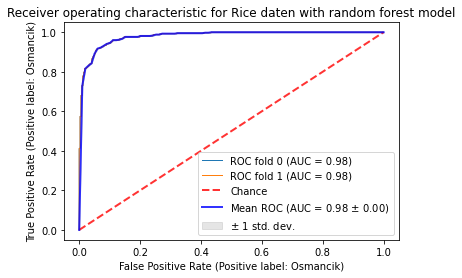

In [133]:
from sklearn import metrics
from itertools import cycle
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits = 2)
classifier = RandomForestClassifier(max_depth = 10, n_estimators = 200, random_state = 0)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X_train, y_train)
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        name = "ROC fold {}".format(i),
        lw = 1,
        ax = ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle = "--", lw = 2, color = "r", label = "Chance", alpha = 0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic for Rice daten with random forest model",
)
ax.legend(loc = "lower right")
plt.show()

## (4) Plotten

eine Kurve mit der Suchzeit, in Abhängigkeit von der Anzahl an CPU-Kernen.

LogisticRegression Model

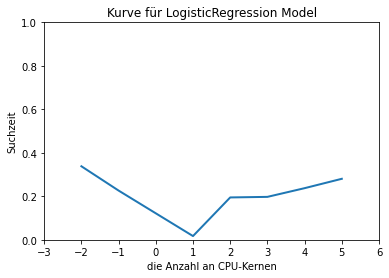

In [134]:
clf1 = GridSearchCV(estimator = LogisticRegression(), param_grid = {'n_jobs': [-2, -1, 1, 2, 3, 4, 5]}, cv = 6).fit(X_train, y_train)
results1 = pd.DataFrame(clf1.cv_results_)
fig, ax = plt.subplots()
ax.plot(results1.param_n_jobs, results1.mean_fit_time, linewidth = 2.0)
plt.title('Kurve für LogisticRegression Model')
plt.xlabel('die Anzahl an CPU-Kernen')
plt.ylabel('Suchzeit')
ax.set(xlim = (-3, 6), ylim = (0, 1))
plt.show()

GaussianNB

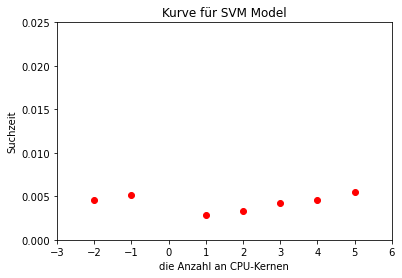

In [135]:
# GaussianNB kann sehr schnell laufen

fig, ax = plt.subplots()
plt.title('Kurve für SVM Model')
plt.xlabel('die Anzahl an CPU-Kernen')
plt.ylabel('Suchzeit')
ax.set(xlim = (-3, 6), ylim = (0, 0.025))

i = -2
for i in range(-2, 6):
    if i == 0: 
        continue
    clf2 = GridSearchCV(estimator = GaussianNB(), param_grid = {}, n_jobs = i).fit(X_train, y_train)
    results2 = pd.DataFrame(clf2.cv_results_).mean_fit_time
    ax.plot(i, results2, 'ro')
    i = i + 1

Vergleich zwischen RandomForestClassifier und GaussianNB Classifier

In [136]:
results3 = pd.DataFrame()
results4 = pd.DataFrame()

i = -2
for i in range(-2, 6):
    if i == 0: 
        continue
    clf3 = GridSearchCV(estimator = RandomForestClassifier(), param_grid = {}, n_jobs = i).fit(X_train, y_train)
    results3 = pd.concat([results3, pd.DataFrame(clf3.cv_results_)], axis = 0, ignore_index = True)
    i = i + 1
    
j = -2
for j in range(-2, 6):
    if j == 0: 
        continue
    clf4 = GridSearchCV(estimator = svm.SVC(), param_grid = {}, n_jobs = j).fit(X_train, y_train)
    results4 = pd.concat([results4, pd.DataFrame(clf4.cv_results_)], axis = 0, ignore_index = True)
    j = j + 1

In [137]:
results = pd.DataFrame({
    'n_jobs': [-2, -1, 1, 2, 3, 4, 5],
    'RandomForestClassifier': results3['mean_fit_time'],
    'SVM Classifier': results4['mean_fit_time'],
})

results

,n_jobs,RandomForestClassifier,SVM Classifier
0,-2,0.376712,0.114051
1,-1,0.376602,0.112603
2,1,0.250976,0.077063
3,2,0.276264,0.084978
4,3,0.301742,0.092382
5,4,0.329682,0.101409
6,5,0.378210,0.114345


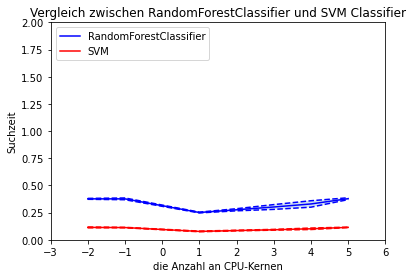

In [138]:
fig, ax = plt.subplots()
plt.title('Vergleich zwischen RandomForestClassifier und SVM Classifier')
plt.xlabel('die Anzahl an CPU-Kernen')
plt.ylabel('Suchzeit')
ax.set(xlim = (-3, 6), ylim=(0, 2))

ax.plot(results['n_jobs'], results['RandomForestClassifier'],  label = 'RandomForestClassifier', c = 'blue')
plt.plot(results['n_jobs'], results['RandomForestClassifier'] + results3['std_fit_time'], "b--")
plt.plot(results['n_jobs'], results['RandomForestClassifier'] - results3['std_fit_time'], "b--")

plt.fill_between(results['n_jobs'], 
                 results['RandomForestClassifier'] + results3['std_fit_time'], results['RandomForestClassifier'] - results3['std_fit_time'], alpha = 0.2)

ax.plot(results['n_jobs'], results['SVM Classifier'], label = 'SVM', c = 'red')
plt.plot(results['n_jobs'], results['SVM Classifier'] + results4['std_fit_time'], "r--")
plt.plot(results['n_jobs'], results['SVM Classifier'] - results4['std_fit_time'], "r--")

plt.fill_between(results['n_jobs'], results['SVM Classifier'] + results4['std_fit_time'], results['SVM Classifier'] - results4['std_fit_time'], alpha = 0.2)

plt.legend(loc="upper left")

Text(0.5, 1.0, 'Boxplot für RandomForestClassifier und SVM Classifier')

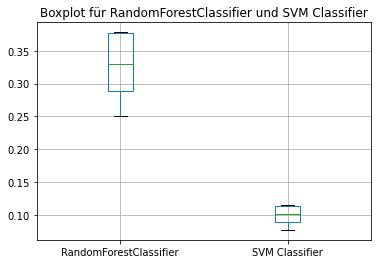

In [139]:
boxplot = results.boxplot(column=['RandomForestClassifier', 'SVM Classifier'])
plt.title('Boxplot für RandomForestClassifier und SVM Classifier')

Zielmetrik in Abhängigkeit von einem Hyperparameter für RandomForestClassifier

In [140]:
df_gridsearch_randForest = pd.DataFrame(gridsearch_randForest.cv_results_)

In [141]:
roc_auc_score(y_train, gridsearch_randForest.predict_proba(X_train)[:, 1])

0.943214724034523

In [142]:
roc_auc_score(y_test, gridsearch_randForest.predict_proba(X_test)[:, 1])

0.9475370919881306

In [143]:
roc = list()
for i in range(2, 6):
    gridsearch_randForest = GridSearchCV(estimator = RandomForestClassifier(), 
                                         param_grid = {'max_depth': [1, 10], 'n_estimators': [3, 200], 'random_state': [0, 10]}, cv = i).fit(X_train, y_train)
    roc.append( roc_auc_score(y_train, gridsearch_randForest.predict_proba(X_train)[:, 1]) )
    i = i + 1
pd.DataFrame(gridsearch_randForest.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006360,0.000199,0.002043,0.000257,1,3,0,"{'max_depth': 1, 'n_estimators': 3, 'random_st...",0.873770,0.880328,0.896721,0.858785,0.878489,0.877619,0.012186,8
1,0.006117,0.000206,0.001925,0.000111,1,3,10,"{'max_depth': 1, 'n_estimators': 3, 'random_st...",0.911475,0.934426,0.947541,0.926108,0.921182,0.928147,0.012216,1
2,0.227036,0.001803,0.015626,0.000104,1,200,0,"{'max_depth': 1, 'n_estimators': 200, 'random_...",0.901639,0.932787,0.924590,0.906404,0.911330,0.915350,0.011607,4
3,0.226876,0.001417,0.015806,0.000182,1,200,10,"{'max_depth': 1, 'n_estimators': 200, 'random_...",0.898361,0.931148,0.926230,0.904762,0.912972,0.914694,0.012427,5
4,0.010192,0.000227,0.002034,0.000065,10,3,0,"{'max_depth': 10, 'n_estimators': 3, 'random_s...",0.903279,0.919672,0.922951,0.909688,0.909688,0.913056,0.007211,6
5,0.009874,0.000260,0.002237,0.000147,10,3,10,"{'max_depth': 10, 'n_estimators': 3, 'random_s...",0.888525,0.913115,0.916393,0.901478,0.911330,0.906168,0.010127,7
6,0.481986,0.007078,0.020791,0.000283,10,200,0,"{'max_depth': 10, 'n_estimators': 200, 'random...",0.911475,0.926230,0.944262,0.917898,0.917898,0.923553,0.011365,2
7,0.480700,0.007423,0.021370,0.000731,10,200,10,"{'max_depth': 10, 'n_estimators': 200, 'random...",0.911475,0.926230,0.936066,0.919540,0.919540,0.922570,0.008209,3


[(1.0, 6.0), (0.0, 1.5)]

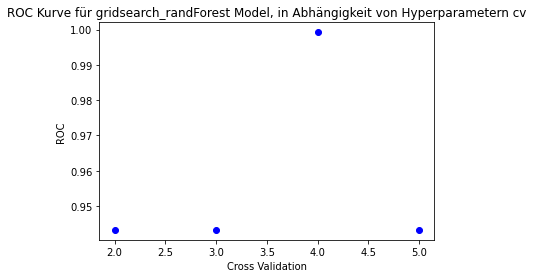

In [144]:
plt.plot([2, 3, 4, 5], roc, 'bo')
plt.title('ROC Kurve für gridsearch_randForest Model, in Abhängigkeit von Hyperparametern cv')
plt.xlabel('Cross Validation')
plt.ylabel('ROC')
ax.set(xlim = (1, 6), ylim = (0, 1.5))